# Анализ рекламного трафика

**Описание проекта**

Есть очень крупный мебельный магазин, рекламой занимаются несколько менеджеров. Они в рамках своих компетенций оптимизируют и управляет рекламными кампаниями. Данные представлены за месяц.

**Цель исследования**

Проанализировать данные по кампаниям, найти зоны роста и сформировать пул гипотез/предложений на следующий месяц. Целевая задача - увеличить доход не менее чем на 10% при сохранении текущего бюджета.

In [1]:
import pandas as pd

import seaborn as sns
#import plotly.graph_objs as go
import matplotlib.pyplot as plt

#import plotly.io as pio
#pio.renderers.default='notebook'

#import plotly.io as pio
#pio.renderers

from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [2]:
df = pd.read_excel('C:\\Anya\\карьерный_трек_ЯП\\тестовые\\мастерская_ЯП\\table.xlsx')
df

,Кампания,Город,Наименование,Тип мебели,Доп инфо,Стоимость,Цена за клик,Цена за конверсию,Цена за транзакцию,Доход от клика,Доход,Рентабельность инвестиций в рекламу,Цена за конверсию / Стоимость
0,msk_couches_corner_selling-words_search-v2,msk,couches,corner,selling-words_search-v2,178034.25,95.256421,2405.868243,0.000000,0.545746,0,0.005729,0.013514
1,chel_mebel_all-types_search,chel,mebel,all-types,search,100986.23,130.811179,1980.122157,0.000000,3.987047,0,0.030479,0.019608
2,spb_bed_generic_search_v5,spb,bed,generic,search_v5,99114.09,88.336979,935.038585,0.000000,0.200535,0,0.002270,0.009434
3,msk_bed_size_network_v5,msk,bed,size,network_v5,97694.04,146.029955,506.186736,0.000000,0.041854,0,0.000287,0.005181
4,msk_bedroom_bed_general-words_akcii_network-v2,msk,bedroom,bed,general-words_akcii_network-v2,93648.00,144.295840,909.203883,0.000000,0.670262,0,0.004645,0.009709
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,msk_magazin-mebeli_asmaster,msk,magazin-mebeli,NaN,NaN,1066203.80,98.041729,358.991178,15913.489552,220.687448,2374281,2.250954,0.000337
496,msk_dsa_pg_search,msk,dsa,pg,search,1689478.74,74.739161,830.210683,25991.980615,113.493563,2536950,1.518529,0.000491
497,msk_smart_banner_retargeting_new_lal_roi,msk,smart,banner,retargeting_new_lal_roi,836894.23,43.672402,204.170342,8539.737041,167.381516,3166232,3.832661,0.000244
498,spb_brand_search-v2,spb,brand,NaN,NaN,1044593.43,64.050121,134.716718,4002.273678,520.975780,8415962,8.133877,0.000129


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Кампания                             500 non-null    object 
 1   Город                                500 non-null    object 
 2   Наименование                         500 non-null    object 
 3   Тип мебели                           454 non-null    object 
 4   Доп инфо                             454 non-null    object 
 5   Стоимость                            500 non-null    float64
 6   Цена за клик                         500 non-null    float64
 7   Цена за конверсию                    500 non-null    float64
 8   Цена за транзакцию                   500 non-null    float64
 9   Доход от клика                       500 non-null    float64
 10  Доход                                500 non-null    int64  
 11  Рентабельность инвестиций в рекл

Посчитаем наш суммарный доход со всех рекламных кампаний и их суммарную стоимость:

In [4]:
df['Доход'].sum()

78217127

In [5]:
df['Стоимость'].sum()

41534217.550000004

Текущая стоимость всех кампаний получилась примерно 41,5 млн, при этом общий доход 78 млн. Нам необходимо повысить наш доход минимум на 10%. Посчитаем его:

In [6]:
df['Доход'].sum() + df['Доход'].sum() * 0.1

86038839.7

Новый доход должен быть не меньше 86 млн.

1) Посмотрим на данные в разрезе по городам:

Сначала определим, сколько у нас всего есть уникальных городов:

In [7]:
df['Город'].nunique()

40

Посмотрим, какие это города:

In [8]:
df['Город'].unique()

array(['msk', 'chel', 'spb', 'nsk', 'tvr', 'kra', 'nnov', 'vor', 'kazan',
       'ros', 'orel', 'perm', 'ryz', 'vlg', 'vld', 'kal', 'yar', 'tul',
       'smol', 'barn', 'sim', 'tmsk', 'sta', 'tyum', 'tamb', 'sarat',
       'lip', 'kursk', 'sev', 'ekb', 'belg', 'cfo', 'bryan', 'ufa',
       'volgd', 'tolyat', 'ivanovo', 'vlad', 'reg', 'countries'],
      dtype=object)

Есть одно значение 'reg', возможно, в него входят рекламные кампании из разных регионов, которые не указаны отдельно в таблице.

In [9]:
df.query('Город == "reg"')

,Кампания,Город,Наименование,Тип мебели,Доп инфо,Стоимость,Цена за клик,Цена за конверсию,Цена за транзакцию,Доход от клика,Доход,Рентабельность инвестиций в рекламу,Цена за конверсию / Стоимость
241,reg_competitors_models_search,reg,competitors,models,search,13222.67,62.666682,314.825476,0.0,0.000000,0,0.000000,0.023810
373,reg_categor_retargeting_new-segment_promokod,reg,categor,retargeting,new-segment_promokod,41580.00,61.508876,151.200000,20790.0,104.850592,68480,1.704642,0.003636
423,reg_categor_retargeting_new-segment_old,reg,categor,retargeting,new-segment_old,24010.00,51.085106,99.626556,6002.5,318.204255,147250,6.228905,0.004149


Есть 1 значение countries в столбце город. Возможно, туда входят товары из других стран.

In [10]:
df.query('Город == "countries"')

,Кампания,Город,Наименование,Тип мебели,Доп инфо,Стоимость,Цена за клик,Цена за конверсию,Цена за транзакцию,Доход от клика,Доход,Рентабельность инвестиций в рекламу,Цена за конверсию / Стоимость
448,countries_couches_generic_search_v5,countries,couches,generic,search_v5,22953.88,35.698103,244.190213,7651.293333,352.628305,223470,9.878069,0.010638


Сгруппируем данные по городам и отсортируем их по доходу:

In [11]:
df_city = df.groupby('Город').sum().reset_index()
df_city = df_city.sort_values(by='Доход', ascending=False)
df_city.head()

,Город,Стоимость,Цена за клик,Цена за конверсию,Цена за транзакцию,Доход от клика,Доход,Рентабельность инвестиций в рекламу,Цена за конверсию / Стоимость
13,msk,19299179.34,7983.073515,63407.260221,2.470294e+06,9401.894861,45353118,121.319685,1.236797
25,spb,6804493.79,4006.523798,34132.414570,1.112810e+06,5296.962237,14907997,63.397391,0.996700
10,kra,1521491.57,1699.126001,17209.845367,3.897371e+05,1651.887844,2635032,33.459201,0.392004
6,ekb,1243319.32,1010.543714,15842.676523,4.283721e+05,1720.109546,2021615,26.896230,0.646312
35,vld,591828.40,912.562447,18359.551151,1.459767e+05,1010.802877,1535677,24.566966,0.770824


Добавим столбец с расчетом доли дохода для каждого города от общего количества:

In [12]:
df_city['% от Дохода'] = df_city['Доход'] / df['Доход'].sum() * 100
df_city.head()

,Город,Стоимость,Цена за клик,Цена за конверсию,Цена за транзакцию,Доход от клика,Доход,Рентабельность инвестиций в рекламу,Цена за конверсию / Стоимость,% от Дохода
13,msk,19299179.34,7983.073515,63407.260221,2.470294e+06,9401.894861,45353118,121.319685,1.236797,57.983615
25,spb,6804493.79,4006.523798,34132.414570,1.112810e+06,5296.962237,14907997,63.397391,0.996700,19.059760
10,kra,1521491.57,1699.126001,17209.845367,3.897371e+05,1651.887844,2635032,33.459201,0.392004,3.368868
6,ekb,1243319.32,1010.543714,15842.676523,4.283721e+05,1720.109546,2021615,26.896230,0.646312,2.584619
35,vld,591828.40,912.562447,18359.551151,1.459767e+05,1010.802877,1535677,24.566966,0.770824,1.963351


Города, в которых доход меньше 1%, объединим в группу 'other':

In [13]:
def city(df_city):
    if df_city['% от Дохода'] >= 1:
        return df_city['Город']
    else:
        return 'other'
df_city['city'] = df_city.apply(city, axis=1)
df_city.head()

,Город,Стоимость,Цена за клик,Цена за конверсию,Цена за транзакцию,Доход от клика,Доход,Рентабельность инвестиций в рекламу,Цена за конверсию / Стоимость,% от Дохода,city
13,msk,19299179.34,7983.073515,63407.260221,2.470294e+06,9401.894861,45353118,121.319685,1.236797,57.983615,msk
25,spb,6804493.79,4006.523798,34132.414570,1.112810e+06,5296.962237,14907997,63.397391,0.996700,19.059760,spb
10,kra,1521491.57,1699.126001,17209.845367,3.897371e+05,1651.887844,2635032,33.459201,0.392004,3.368868,kra
6,ekb,1243319.32,1010.543714,15842.676523,4.283721e+05,1720.109546,2021615,26.896230,0.646312,2.584619,ekb
35,vld,591828.40,912.562447,18359.551151,1.459767e+05,1010.802877,1535677,24.566966,0.770824,1.963351,vld


In [14]:
df_city_new = df_city[['Город', '% от Дохода', 'city']]
df_city_new = df_city_new.groupby('city').sum().sort_values(by='% от Дохода', ascending=False).reset_index()
df_city_new

,city,% от Дохода
0,msk,57.983615
1,spb,19.059760
2,other,11.236571
3,kra,3.368868
4,ekb,2.584619
5,vld,1.963351
6,nnov,1.355519
7,vor,1.249972
8,ros,1.197724


Построим круговую диаграмму, чтобы показать, как распределена доля дохода по городам.

In [15]:
fig = go.Figure()
fig.add_trace(go.Pie(values=df_city_new['% от Дохода'], labels=df_city_new['city'], title = 'Процент дохода по городам'))
fig.show()
#fig.show(renderer="svg")

Видим, что наибольшая доля дохода принадлежит Москве, она составляет 58%. На 2 месте Санкт-Петербург с 19%.

In [16]:
df_city.head()

,Город,Стоимость,Цена за клик,Цена за конверсию,Цена за транзакцию,Доход от клика,Доход,Рентабельность инвестиций в рекламу,Цена за конверсию / Стоимость,% от Дохода,city
13,msk,19299179.34,7983.073515,63407.260221,2.470294e+06,9401.894861,45353118,121.319685,1.236797,57.983615,msk
25,spb,6804493.79,4006.523798,34132.414570,1.112810e+06,5296.962237,14907997,63.397391,0.996700,19.059760,spb
10,kra,1521491.57,1699.126001,17209.845367,3.897371e+05,1651.887844,2635032,33.459201,0.392004,3.368868,kra
6,ekb,1243319.32,1010.543714,15842.676523,4.283721e+05,1720.109546,2021615,26.896230,0.646312,2.584619,ekb
35,vld,591828.40,912.562447,18359.551151,1.459767e+05,1010.802877,1535677,24.566966,0.770824,1.963351,vld


Посмотрим, как распределена стоимость рекламных кампаний по городам и доходы:

In [17]:
data = df_city[['Город', 'Стоимость', 'Доход']]
data.head()

,Город,Стоимость,Доход
13,msk,19299179.34,45353118
25,spb,6804493.79,14907997
10,kra,1521491.57,2635032
6,ekb,1243319.32,2021615
35,vld,591828.40,1535677


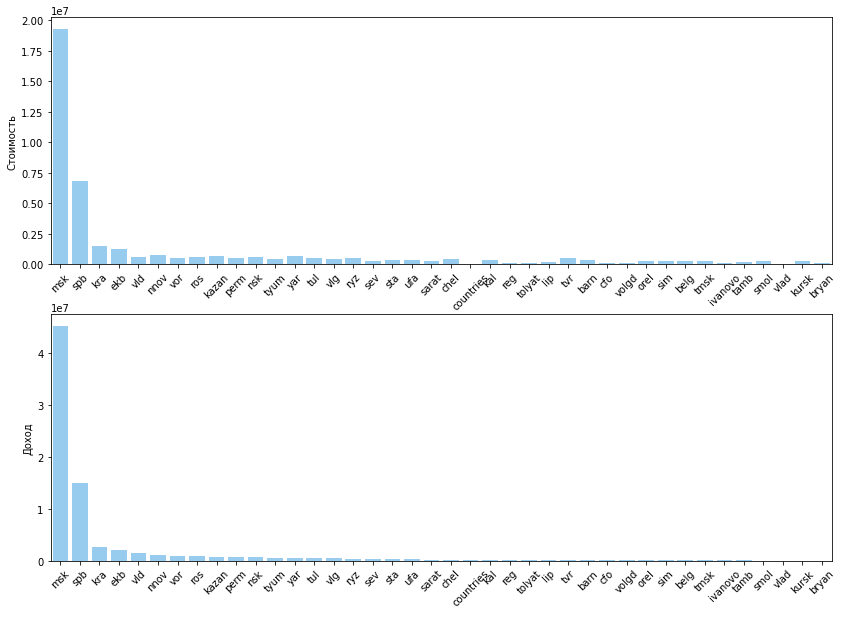

In [18]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 1, 1)
sns.barplot(x='Город', y='Стоимость', data=data, color='#89CFFD')
plt.xticks(rotation=45)
plt.xlabel(' ')

plt.subplot(2, 1, 2)
sns.barplot(x='Город', y='Доход', data=data, color='#89CFFD')
plt.xticks(rotation=45)
plt.xlabel(' ')

plt.show()

Видим, что максимальный доход нам приносит Москва, на 2 месте - Санкт-Петербург. Далее идет много городов с доходом менее 1 млн. Затраты на рекламные кампании Брянска составляют 99578.90, при этом они совсем не приносят нам доход. В дальнейшем можно перестать вкладываться в рекламные кампании Брянска, чтобы сократить наши траты.

Посчитаем рентабельность затрат, поделив доход на стоимость:

In [19]:
data['Рентабельность'] = (data['Доход'] - data['Стоимость']) / data['Доход'] * 100
data = data.sort_values(by='Рентабельность', ascending=False)
data.head()

C:\Users\annsl\AppData\Local\Temp\ipykernel_15880\2240598205.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Город,Стоимость,Доход,Рентабельность
5,countries,22953.88,223470,89.728429
18,reg,78812.67,215730,63.466987
35,vld,591828.40,1535677,61.461401
13,msk,19299179.34,45353118,57.446852
25,spb,6804493.79,14907997,54.356754


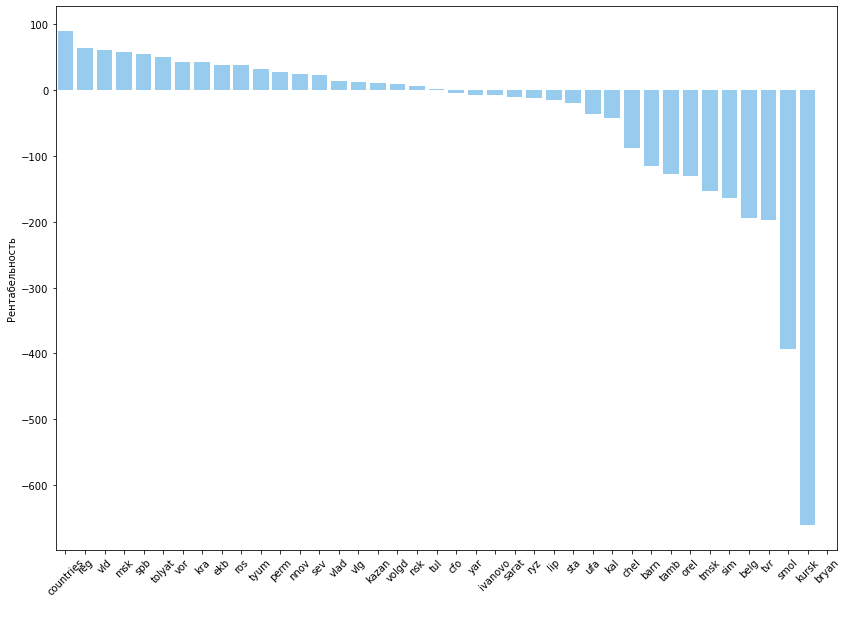

In [20]:
plt.figure(figsize=(14, 10))
sns.barplot(x='Город', y='Рентабельность', data=data, color='#89CFFD')
plt.xticks(rotation=45)
plt.xlabel(' ')
plt.show()

Несмотря на то, что максимальный доход приносит нам Москва и Санкт-Петербург, их рентабельность оказалась все равно ниже, чем для reg, countries и Владивостока. Для countries рентабельность самая большая, почти 100, при том, что затраты на рекламные кампании небольшие. Получается, для нас самыми выгодными оказываются кампании из других стран и регионов, не указанных отдельно в таблице. Также видим, что у нас полно городов, кампании которых приносят нам только убытки.

Посмотрим отдельно на города с рентабельностью меньше 0. Все эти рекламные кампании убыточны.

In [21]:
data_rent = data.query('Рентабельность < 0')
data_rent

,Город,Стоимость,Доход,Рентабельность
3,cfo,149983.46,143322,-4.647898
39,yar,648397.19,603221,-7.489161
7,ivanovo,94310.46,87140,-8.228667
21,sarat,282279.33,256580,-10.016108
20,ryz,493298.49,442670,-11.437073
12,lip,217282.64,188220,-15.440782
26,sta,384189.23,321910,-19.346783
33,ufa,394920.84,288942,-36.678240
8,kal,316893.79,222295,-42.555519
4,chel,449321.29,238390,-88.481602


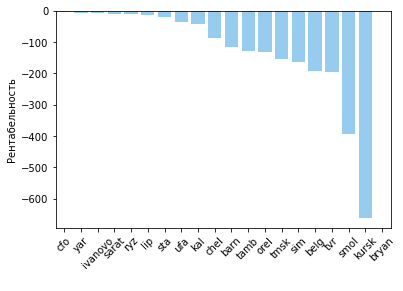

In [22]:
sns.barplot(x='Город', y='Рентабельность', data=data_rent, color='#89CFFD')
plt.xticks(rotation=45)
plt.xlabel(' ')
plt.show()

В дальнейшем я бы перестала вкладывать деньги в города с сильно убыточными кампаниями (chel, barn, tamb, orel, tmsk, sim, belg, tvr, smol, kursk, bryan). Лучше перераспределить их бюджет на другие кампании.

2) Теперь посмотрим, как распределен наш доход по наименованию продукта:

In [23]:
df_furniture = df.groupby(['Город', 'Наименование']).sum().sort_values(by='Доход', ascending=False).reset_index()
df_furniture['Рентабельность'] = (df_furniture['Доход'] - df_furniture['Стоимость']) / df_furniture['Доход'] * 100
df_furniture

,Город,Наименование,Стоимость,Цена за клик,Цена за конверсию,Цена за транзакцию,Доход от клика,Доход,Рентабельность инвестиций в рекламу,Цена за конверсию / Стоимость,Рентабельность
0,msk,brand,3069402.85,116.688118,324.398759,1.947336e+04,604.086312,19959642,9.515574,0.005769,84.621954
1,spb,brand,1148526.83,127.078260,474.368352,2.478895e+04,680.618594,8679000,10.666758,0.003397,86.766599
2,msk,smart,1819910.69,159.101134,798.861132,5.061242e+04,409.298895,5714937,8.005460,0.001852,68.155192
3,msk,couches,5275775.03,4272.513349,42167.086476,1.583423e+06,3327.716662,4458753,35.566650,0.853924,-18.324003
4,msk,magazin-mebeli,1675053.21,397.172569,2477.200213,1.711690e+05,603.407531,4336039,9.085034,0.028408,61.369046
...,...,...,...,...,...,...,...,...,...,...,...
227,ros,korpus,50449.76,86.386575,1051.036667,0.000000e+00,0.000000,0,0.000000,0.020833,-inf
228,ros,dsa,43584.33,73.997165,889.476122,0.000000e+00,1.035654,0,0.013996,0.020408,-inf
229,reg,competitors,13222.67,62.666682,314.825476,0.000000e+00,0.000000,0,0.000000,0.023810,-inf
230,orel,wardrobe,14610.21,149.083776,2922.042000,0.000000e+00,0.000000,0,0.000000,0.200000,-inf


У многих товаров нулевая цена за транзакцию, польлзвоатели не покупают данный тип мебели, следовательно, доход тоже нулевой.

Посмотрим, как распределена стоимость и доход по наименованию товара:

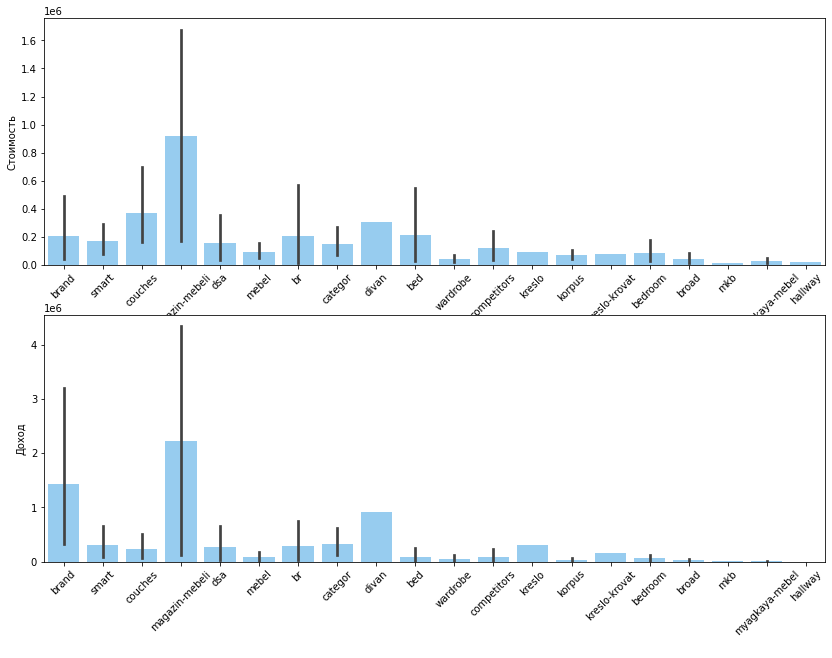

In [24]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 1, 1)
sns.barplot(x='Наименование', y='Стоимость', data=df_furniture, color='#89CFFD')
plt.xticks(rotation=45)
plt.xlabel(' ')

plt.subplot(2, 1, 2)
sns.barplot(x='Наименование', y='Доход', data=df_furniture, color='#89CFFD')
plt.xticks(rotation=45)
plt.xlabel(' ')

plt.show()

Наибольшие затраты у нас на magazin-mebeli, но и наибольший доход тоже у него

Посмотрим на рентабельность товаров:

In [25]:
furniture = df[['Наименование', 'Стоимость', 'Доход']]
furniture = furniture.groupby('Наименование').sum().reset_index()
furniture['Рентабельность'] = (furniture['Доход'] - furniture['Стоимость']) / furniture['Доход'] * 100
furniture = furniture.sort_values(by='Рентабельность', ascending=False)
furniture

,Наименование,Стоимость,Доход,Рентабельность
3,brand,5402072.97,37178445,85.469879
12,kreslo,90913.26,307786,70.462185
8,divan,307563.14,912574,66.297184
14,magazin-mebeli,1845029.55,4459039,58.622709
5,categor,908786.98,1955831,53.534483
13,kreslo-krovat,79411.34,152010,47.759134
18,smart,5966424.20,10983050,45.676072
9,dsa,3669861.48,6004836,38.884901
2,br,1031690.30,1424732,27.587062
19,wardrobe,938515.71,1048457,10.486008


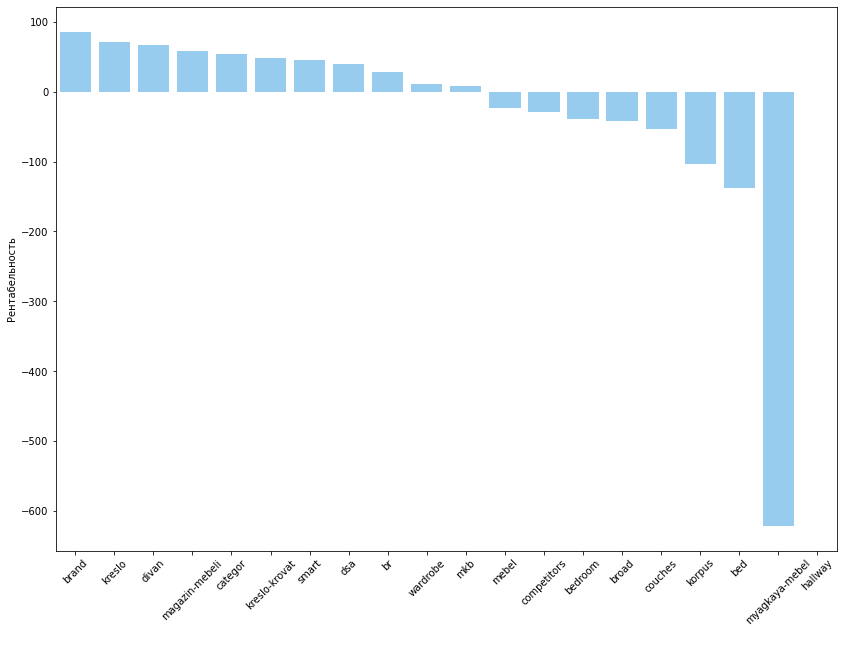

In [26]:
plt.figure(figsize=(14, 10))
sns.barplot(x='Наименование', y='Рентабельность', data=furniture, color='#89CFFD')
plt.xticks(rotation=45)
plt.xlabel(' ')
plt.show()

In [27]:
furniture_no_income = furniture.query('Рентабельность < 0')
furniture_no_income

,Наименование,Стоимость,Доход,Рентабельность
15,mebel,2933126.77,2387548,-22.851007
6,competitors,829557.64,639217,-29.777155
1,bedroom,350720.83,251684,-39.349673
4,broad,133988.55,94460,-41.846866
7,couches,13997995.97,9080755,-54.150134
11,korpus,999139.63,490782,-103.581148
0,bed,1956748.82,824390,-137.357176
17,myagkaya-mebel,61576.23,8541,-620.948718
10,hallway,19171.81,0,-inf


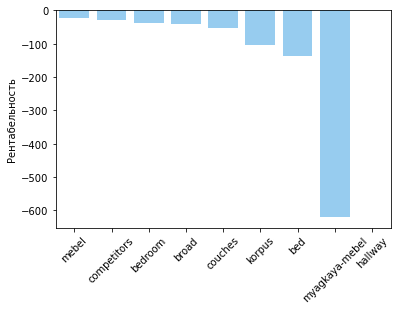

In [28]:
sns.barplot(x='Наименование', y='Рентабельность', data=furniture_no_income, color='#89CFFD')
plt.xlabel(' ')
plt.xticks(rotation=45)
plt.show()

Наибольшие потери у нас от рекламной кампании myagkaya-mebel и hallway. В следующем месяце можно совсем перестать в нее вкладываться.

Определим, в каких городах и какой тип мебели совсем не приносит нам доход:

In [29]:
df_furniture_no_income = df_furniture.query('Доход == 0')
df_furniture_no_income = df_furniture_no_income.groupby(['Город', 'Наименование']).sum()
df_furniture_no_income

Стоимость  Цена за клик  Цена за конверсию  \
Город Наименование                                               
barn  couches       186553.51    158.454614        5276.241219   
      dsa            12462.79     50.868531         733.105294   
      mebel          48919.02     91.902967        2073.994054   
belg  dsa            18249.36     62.497808        1013.853333   
      mebel          51570.84    154.892657        4012.474620   
...                       ...           ...                ...   
vor   mebel          45004.50     86.386679        1329.340162   
yar   bed            32757.17     96.628820        1213.228519   
      couches       219263.51    288.713471        5404.092269   
      dsa            59828.87    153.630770        1871.067958   
      wardrobe       18584.31     82.965670        1429.562308   

                    Цена за транзакцию  Доход от клика  Доход  \
Город Наименование                                              
barn  couches                      0.0        2.694619      0   
      dsa                          0.0        0.020408      0   
      mebel                        0.0        0.010076      0   
belg  dsa                          0.0        0.000000      0   
      mebel                        0.0        1.502110      0   
...                                ...             ...    ...   
vor   mebel                        0.0        0.005479      0   
yar   bed                          0.0        1.321534      0   
      couches                      0.0        0.993628      0   
      dsa                          0.0        0.067227      0   
      wardrobe                     0.0        0.000000      0   

                    Рентабельность инвестиций в рекламу  \
Город Наименование                                        
barn  couches                                  0.078594   
      dsa                                      0.000401   
      mebel                                    0.000221   
belg  dsa                                      0.000000   
      mebel                                    0.045311   
...                                                 ...   
vor   mebel                                    0.000125   
yar   bed                                      0.013676   
      couches                                  0.022182   
      dsa                                      0.000886   
      wardrobe                                 0.000000   

                    Цена за конверсию / Стоимость  Рентабельность  
Город Наименование                                                 
barn  couches                            0.157724            -inf  
      dsa                                0.058824            -inf  
      mebel                              0.138514            -inf  
belg  dsa                                0.055556            -inf  
      mebel                              0.146739            -inf  
...                                           ...             ...  
vor   mebel                              0.087449            -inf  
yar   bed                                0.037037            -inf  
      couches                            0.160749            -inf  
      dsa                                0.066734            -inf  
      wardrobe                           0.076923            -inf  

[82 rows x 9 columns]

**Вывод:**

1) Выяснили, что наибольшая доля дохода принадлежит Москве, она составляет 58%. На 2 месте Санкт-Петербург с 19%. Далее идет много городов с доходом менее 1 млн.  
2) Затраты на рекламные кампании Брянска составляют 99578.90, при этом они совсем не приносят нам доход.  
3) Рентабельность Москвы и Санкт-Петербурга оказалась ниже, чем для reg, countries и Владивостока. Для countries рентабельность самая большая, почти 100, при том, что затраты на рекламные кампании небольшие.  
4) Наибольшие потери от рекламной кампании myagkaya-mebel и hallway, при этом затраты на myagkaya-mebel максимальные, но они совсем не окупаются.

**Рекомендации:**

1) Перестать вкладываться в сильно убыточные рекламные кампании (с отрицательной рентабельностью) chel, barn, tamb, orel, tmsk, sim, belg, tvr, smol, kursk, bryan.  
2) Перераспределить бюджет убыточных кампаний на тех, у которых рентабельность положительная.  
3) Больше вкладываться в компании reg, countries и Владивостока для еще большего увеличения их дохода.  
4) Перестать вкладываться в рекламные кампании myagkaya-mebel и увеличить вложения в следующие типы мебели: kreslo, divan, kreslo-krovat, wardrobe, dsa, br.